# Exercises

## 1. 

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib

In [63]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False) #With as_frame=False, openml returns a NumPy array

C:\Users\Finn\miniconda3\envs\homl3\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [64]:
X = mnist.data
y = mnist.target

In [65]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

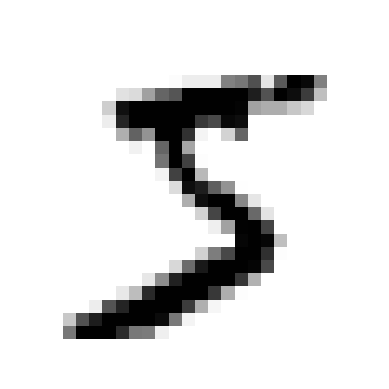

Label: 5


In [66]:
# Testing the function

plot_digit(X[0])
plt.show()
print(f"Label: {y[0]}")

## Exploring the data

### General Shape and dtypes of Attribute

In [67]:
# Copy dataset to expiriment
X_ = X.copy()
y_ = y.copy()

In [68]:
X_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [69]:
y_

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [70]:
print(type(X_))
print(type(y_))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [71]:
print(X_.shape)
print(y_.shape)

(70000, 784)
(70000,)


In [72]:
28 * 28

784

70,000 Images with 28 * 28 pixels each

In [73]:
type(X_[0][0])

numpy.float64

In [74]:
np.unique(X_)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

Apparently only integers between 0 and 2^8 - 1

In [75]:
type(y_[0])

str

=> String?

In [76]:
np.unique(y_)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

Only strings from '0' to '9'

And no empty string -> no missing labels

### Looking for missing values

In [77]:
np.isnan(X_).sum() # Number of missing entries in X

0

No missing values in features

### Looking at the noisiness of of the data

Pixel variance

(784,)


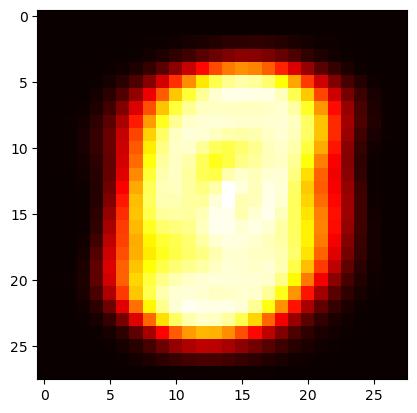

In [78]:
pixel_variance = np.var(X_, axis=0)
print(pixel_variance.shape)

plt.imshow(pixel_variance.reshape(28, 28), cmap="hot")
plt.show()

The center pixels seem to be have greater importance. 

### Looking at the distributions

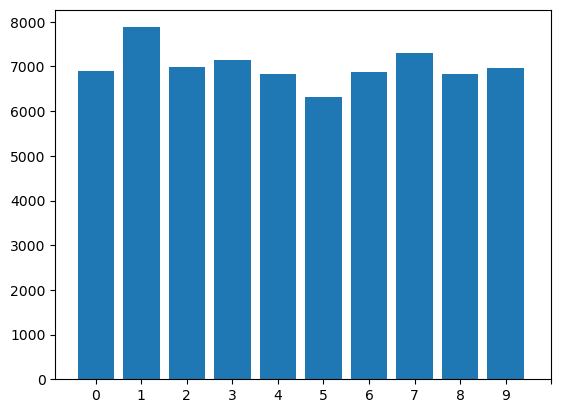

In [79]:
y_.sort()
plt.hist(y_, bins=range(11), align="left", rwidth=0.8)
plt.xticks(range(11))
plt.show()

Seems to be pretty evenly distributed, but 1 and 7 stick out slightly
=> Uniform distribution

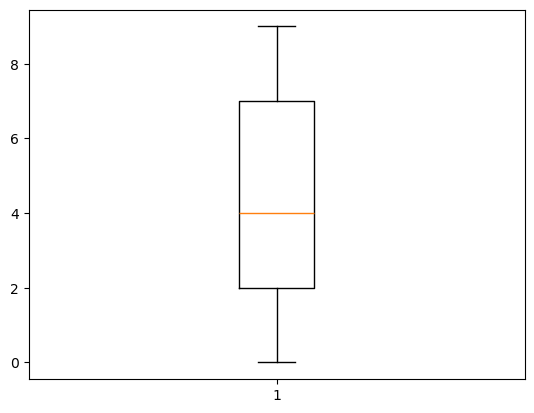

In [80]:
plt.boxplot(y_.astype(int))
plt.show()

### Visualising the data 

In [81]:
X_reshaped = np.asarray(X_).reshape(-1, 28, 28)
print(X_reshaped.shape)

(70000, 28, 28)


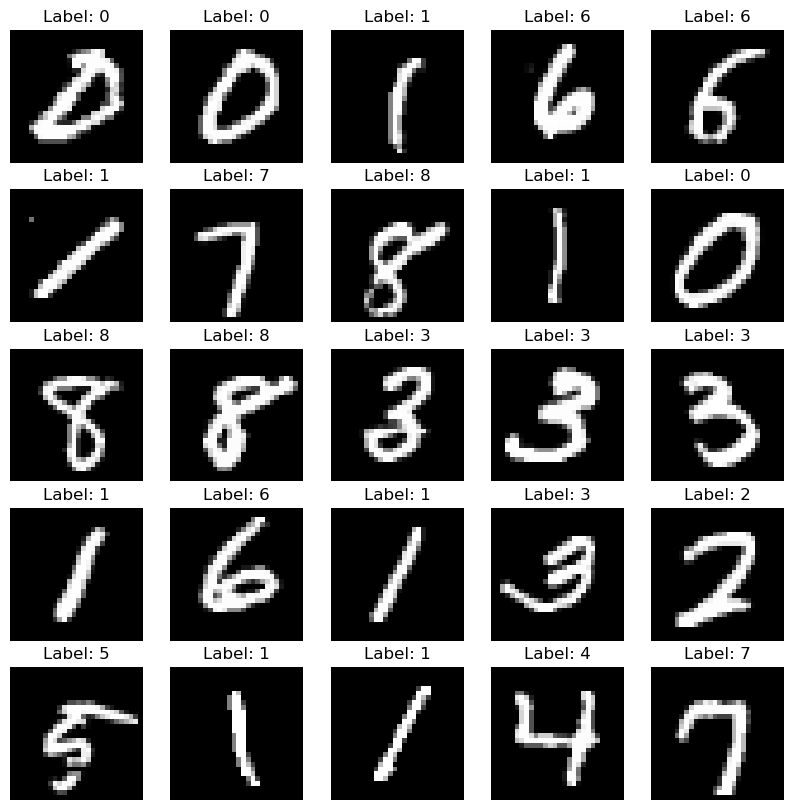

In [82]:
# Plotting random samples
num_samples = 25

np.random.seed(42)
indices = np.random.randint(0, 70_000, num_samples)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(indices):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_reshaped[idx], cmap="gray")
    plt.title(f"Label: {y[idx]}")
    plt.axis("off")
plt.show()

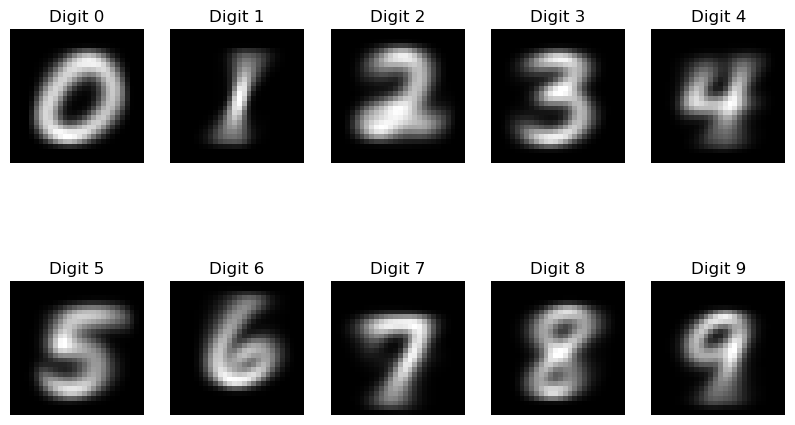

In [83]:
# Mean image per class

mean_imgs = []

# Computing mean for each clas
for i in range(10):
    imgs = X_reshaped[np.where(y == str(i))]
    mean_imgs.append(np.mean(imgs, axis=0))

# Ploting the mean images
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(mean_imgs[i], cmap="gray")
    plt.title(f"Digit {i}")
    plt.axis("off")
plt.show()

#### Principal Component Analysis

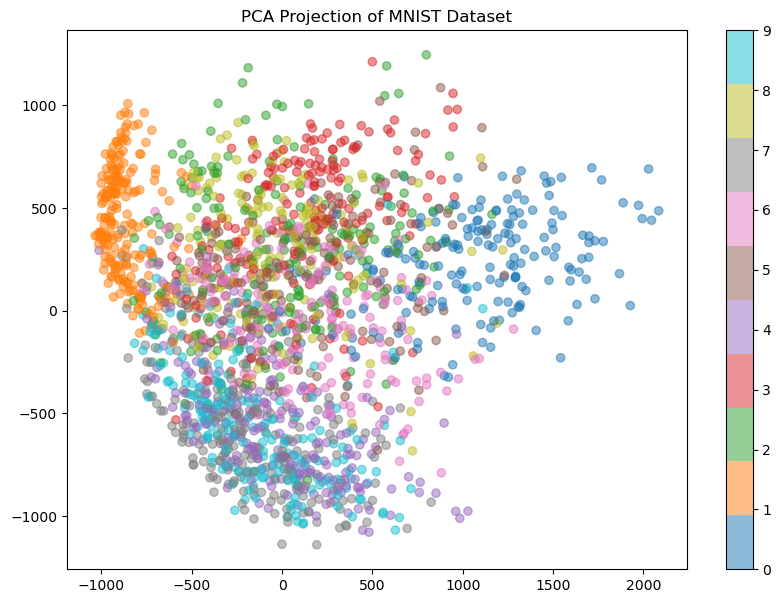

In [84]:
from sklearn.decomposition import PCA

# Reduce the dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X[:2000])

# Plot the 2D projection with labels
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y[:2000].astype(int), cmap='tab10', alpha=0.5)
plt.title('PCA Projection of MNIST Dataset')
plt.colorbar(scatter)
plt.show()

In [85]:
principal_components = pca.components_
print(principal_components)

[[ 1.65830660e-18 -7.04560569e-19 -1.00881832e-18 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.11787242e-17  1.95244185e-17  2.19747376e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


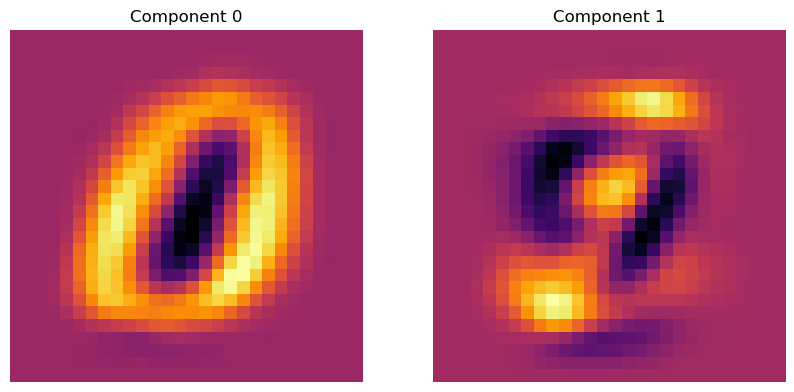

In [86]:
plt.figure(figsize=(10, 20))
for i in range(2):
    min = np.min(pca.components_[i])
    max = np.max(pca.components_[i])
    plt.subplot(1, 2, i+1)
    plt.imshow(principal_components[i].reshape(28, 28), cmap="inferno", vmax=max, vmin=min)
    plt.title(f"Component {i}")
    plt.axis("off")
plt.show()

In [87]:
print(pca.explained_variance_ratio_)

[0.10009538 0.07460617]


The two componenents capture ca. 17% of the variance in the dataset (first 200 samples)

#### t-SNE

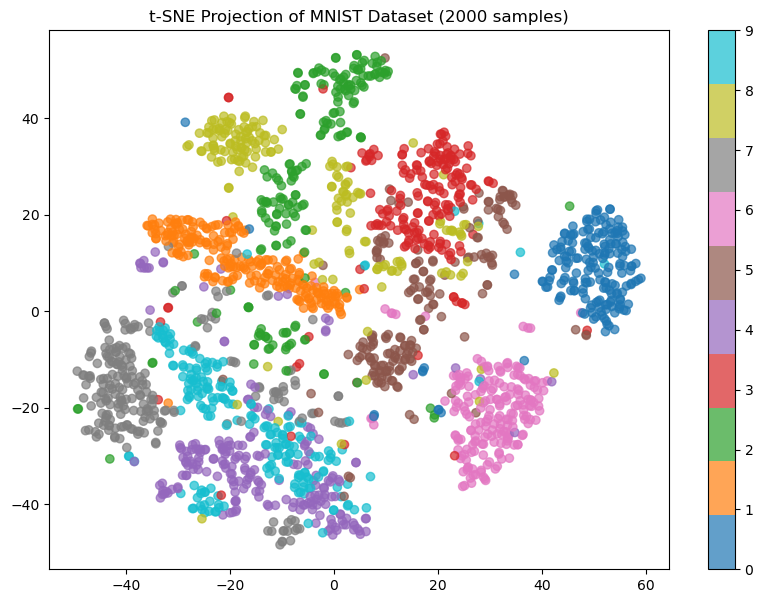

In [88]:
from sklearn.manifold import TSNE

# Reduce the dimensionality to 2D using t-SNE
X_tsne = TSNE(n_components=2).fit_transform(X[:2000])

# Plot the 2D projection with labels
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y[:2000].astype(int), cmap='tab10', alpha=0.7)
plt.title('t-SNE Projection of MNIST Dataset (2000 samples)')
plt.colorbar(scatter)
plt.show()


### KNN Classifier 

In [89]:
# Splitting the data

X_train = X[:50_000]
X_test = X[50_000:]
y_train = y[:50_000]
y_test = y[50_000:]

In [90]:
# Preprocessing 

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

preprocessing = Pipeline([
    ('scaling', MinMaxScaler())
])

In [91]:
from sklearn.neighbors import KNeighborsClassifier

model = Pipeline([
    ('preprocessing', preprocessing),
    ('knn', KNeighborsClassifier(n_neighbors=10, weights='uniform'))
])

In [92]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'knn__n_neighbors': [2, 4, 8, 12, 16, 32],
     'knn__weights': ['uniform', 'distance']}
]

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('scaling',
                                                         MinMaxScaler())])),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=10))]),
             param_grid=[{'knn__n_neighbors': [2, 4, 8, 12, 16, 32],
                          'knn__weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [93]:
grid_search.best_params_

{'knn__n_neighbors': 4, 'knn__weights': 'distance'}

In [94]:
grid_search.best_score_

0.9671199747731914

In [95]:
cv_results = pd.DataFrame(grid_search.cv_results_)

cv_results.sort_values(by=["mean_test_score"], axis=0, ascending=False, inplace=True)

cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,0.268001,0.003266,2.881332,0.012119,4,distance,"{'knn__n_neighbors': 4, 'knn__weights': 'dista...",0.968501,0.967001,0.965859,0.96712,0.001082,1
1,0.264333,0.005558,2.864333,0.018909,2,distance,"{'knn__n_neighbors': 2, 'knn__weights': 'dista...",0.967001,0.964541,0.963519,0.96502,0.001461,2
5,0.263334,0.000471,2.871667,0.022291,8,distance,"{'knn__n_neighbors': 8, 'knn__weights': 'dista...",0.964181,0.964661,0.963939,0.96426,0.000300,3
2,0.269000,0.004083,2.848000,0.008524,4,uniform,"{'knn__n_neighbors': 4, 'knn__weights': 'unifo...",0.963281,0.963281,0.962318,0.96296,0.000454,4
4,0.266332,0.002055,2.871000,0.035109,8,uniform,"{'knn__n_neighbors': 8, 'knn__weights': 'unifo...",0.961841,0.962861,0.961298,0.96200,0.000648,5
7,0.278000,0.003559,2.886333,0.033320,12,distance,"{'knn__n_neighbors': 12, 'knn__weights': 'dist...",0.960941,0.960761,0.961058,0.96092,0.000122,6
6,0.272667,0.005185,2.854666,0.009428,12,uniform,"{'knn__n_neighbors': 12, 'knn__weights': 'unif...",0.959141,0.958301,0.958658,0.95870,0.000344,7
9,0.272000,0.001632,2.993333,0.032428,16,distance,"{'knn__n_neighbors': 16, 'knn__weights': 'dist...",0.958241,0.957221,0.957098,0.95752,0.000512,8
0,0.263666,0.009533,2.881335,0.052824,2,uniform,"{'knn__n_neighbors': 2, 'knn__weights': 'unifo...",0.958241,0.956321,0.957278,0.95728,0.000784,9
8,0.275103,0.003140,2.939334,0.031626,16,uniform,"{'knn__n_neighbors': 16, 'knn__weights': 'unif...",0.955661,0.954701,0.954338,0.95490,0.000558,10


In [96]:
best_model = grid_search.best_estimator_

Using a finer parameter grid

In [97]:
param_grid = [
    {'knn__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 10],
     'knn__weights': ['uniform', 'distance']}
]

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('scaling',
                                                         MinMaxScaler())])),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=10))]),
             n_jobs=-1,
             param_grid=[{'knn__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 10],
                          'knn__weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [98]:
cv_results_2 = pd.DataFrame(grid_search.cv_results_)

cv_results_2.sort_values(by=["mean_test_score"], axis=0, ascending=False, inplace=True)

cv_results_2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
5,2.494334,2.681897,41.381000,1.023023,4,distance,"{'knn__n_neighbors': 4, 'knn__weights': 'dista...",0.968501,0.967001,0.965859,0.96712,0.001082,1
3,4.742000,1.158580,45.188000,1.120615,3,distance,"{'knn__n_neighbors': 3, 'knn__weights': 'dista...",0.967301,0.966701,0.965259,0.96642,0.000857,2
9,0.835333,0.141930,39.451999,1.291807,6,distance,"{'knn__n_neighbors': 6, 'knn__weights': 'dista...",0.967121,0.966401,0.965259,0.96626,0.000767,3
2,5.603000,0.572659,43.461334,2.996144,3,uniform,"{'knn__n_neighbors': 3, 'knn__weights': 'unifo...",0.965621,0.965561,0.964599,0.96526,0.000468,4
7,0.844666,0.114359,42.277000,0.848882,5,distance,"{'knn__n_neighbors': 5, 'knn__weights': 'dista...",0.965741,0.965801,0.963999,0.96518,0.000836,5
1,3.305667,0.208171,43.768999,2.411514,2,distance,"{'knn__n_neighbors': 2, 'knn__weights': 'dista...",0.967001,0.964541,0.963519,0.96502,0.001461,6
13,0.683334,0.040549,40.197332,0.837440,8,distance,"{'knn__n_neighbors': 8, 'knn__weights': 'dista...",0.964181,0.964661,0.963939,0.96426,0.000300,7
11,0.593667,0.018784,40.096334,0.978964,7,distance,"{'knn__n_neighbors': 7, 'knn__weights': 'dista...",0.963701,0.963761,0.963939,0.96380,0.000101,8
6,0.598667,0.014659,43.847667,0.402369,5,uniform,"{'knn__n_neighbors': 5, 'knn__weights': 'unifo...",0.964361,0.964181,0.962799,0.96378,0.000698,9
4,6.182667,0.332778,42.086001,1.073702,4,uniform,"{'knn__n_neighbors': 4, 'knn__weights': 'unifo...",0.963281,0.963281,0.962318,0.96296,0.000454,10


In [99]:
best_model = grid_search.best_estimator_

In [100]:
from sklearn.metrics import accuracy_score

def test_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    correct_predictions = np.sum(y_test == y_pred)
    total_predictions = len(y_test)
    accuracy = correct_predictions / total_predictions
    print(f"Accuracy: {accuracy * 100:.2f}%")

In [101]:
test_model(best_model, X_test, y_test)

Accuracy: 97.15%


Above 97% accuracy!

## 2.

Data augmentation

In [102]:
from scipy.ndimage import shift

# Direction can range between 0 and 3
# 0 = Up, 1 = Right, 2 = Down, 3 = Left
def shift_mnist_image(image, direction:int): 
    if (direction < 0 or direction > 3):
        raise ValueError("Direction can only range between 0 and 3")
    # Convert to np array and reshape to 28x28 pixels
    arr = np.asarray(image)
    arr = np.reshape(arr, newshape=(28, 28))
    shift_direction = (0, 0)
    match direction:
        case 0:
            shift_direction = (-1, 0)
        case 1:
            shift_direction = (0, 1)
        case 2: 
            shift_direction = (1, 0)
        case 3:
            shift_direction = (0, -1)
    arr = shift(arr, shift_direction)
    return arr
    

Try the new function

In [103]:
arr = shift_mnist_image(X_[0], 3)

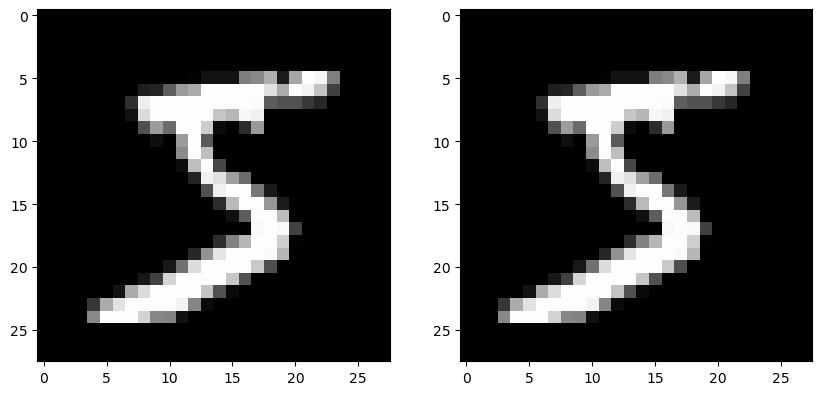

In [104]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(X_[0].reshape(28, 28), cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(arr.reshape(28, 28), cmap="gray")
plt.show()

In [105]:
shifted_images = [[shift_mnist_image(X_train[j], i) for j in range(len(X_train))] for i in range(4)]

In [106]:
shifted_images = np.asarray(shifted_images)
shifted_images.shape

(4, 50000, 28, 28)

Creating augmented dataset

In [107]:
X_train_augmented = np.reshape(shifted_images, newshape=(-1, 28, 28))
y_train_augmented = np.tile(y_train, 4)

print(X_train_augmented.shape)
print(y_train_augmented.shape)

(200000, 28, 28)
(200000,)


Checking if augementation was successful

[121958 146867 131932 103694 119879 110268  54886 137337 168266  87498]


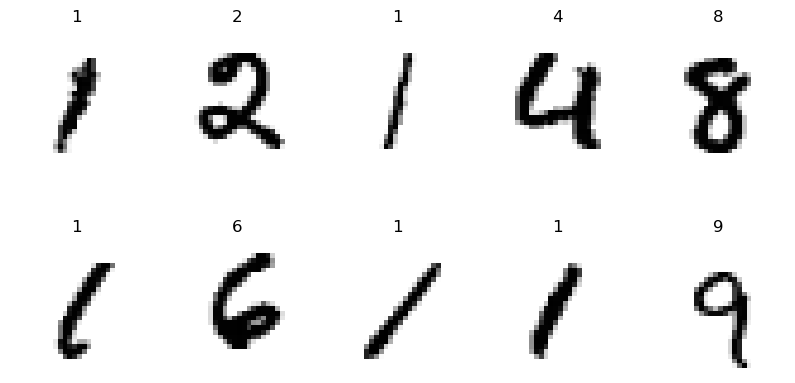

In [108]:
np.random.seed(42)
indices = np.random.randint(low=0, high=199_999, size=(10))
print(indices)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train_augmented[indices[i]], cmap='binary')
    plt.title(y_train_augmented[indices[i]])
    plt.axis('off')
plt.show()

Training a model on new Dataset 

In [109]:
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'knn', 'preprocessing__memory', 'preprocessing__steps', 'preprocessing__verbose', 'preprocessing__scaling', 'preprocessing__scaling__clip', 'preprocessing__scaling__copy', 'preprocessing__scaling__feature_range', 'knn__algorithm', 'knn__leaf_size', 'knn__metric', 'knn__metric_params', 'knn__n_jobs', 'knn__n_neighbors', 'knn__p', 'knn__weights'])

In [110]:
best_model.get_params()

{'memory': None,
 'steps': [('preprocessing', Pipeline(steps=[('scaling', MinMaxScaler())])),
  ('knn', KNeighborsClassifier(n_neighbors=4, weights='distance'))],
 'verbose': False,
 'preprocessing': Pipeline(steps=[('scaling', MinMaxScaler())]),
 'knn': KNeighborsClassifier(n_neighbors=4, weights='distance'),
 'preprocessing__memory': None,
 'preprocessing__steps': [('scaling', MinMaxScaler())],
 'preprocessing__verbose': False,
 'preprocessing__scaling': MinMaxScaler(),
 'preprocessing__scaling__clip': False,
 'preprocessing__scaling__copy': True,
 'preprocessing__scaling__feature_range': (0, 1),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 4,
 'knn__p': 2,
 'knn__weights': 'distance'}

In [111]:
X_train_augmented.shape

(200000, 28, 28)

Need to flatten images again, in order to feed them into sklearn

In [112]:
X_train_augmented_flat = np.reshape(X_train_augmented, newshape=(-1, 28*28))
X_train_augmented_flat.shape

(200000, 784)

In [113]:
best_params = {
    'knn__n_neighbors': 4,
    'knn__weights': 'distance',
    'knn__n_jobs': -1,
}

model.set_params(**best_params)

model.fit(X_train_augmented_flat, y_train_augmented)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('scaling', MinMaxScaler())])),
                ('knn',
                 KNeighborsClassifier(n_jobs=-1, n_neighbors=4,
                                      weights='distance'))])

In [114]:
test_model(model, X_test=X_test, y_test=y_test)

Accuracy: 97.48%


The accuracy got even better!

## 3.

In [115]:
data = pd.read_csv("../data/train.csv")
test_set = pd.read_csv("../data/test.csv")

In [116]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [117]:
data.shape

(891, 12)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [119]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Adjusting the data

In [120]:
# Splitting the data into X and y

X = data.drop('Survived', axis=1)
y = data.loc[:, 'Survived']
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (891, 11)
y shape: (891,)


In [121]:
# Dropping 'PassengerId' and 'Name' attributes
X = X.drop(['PassengerId', 'Name'], axis=1)
print(f'X shape: {X.shape}')

X shape: (891, 9)


In [122]:
# Splitting the data into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (712, 9)
y_train shape: (712,)
X_test shape: (179, 9)
y_test shape: (179,)


In [123]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 25 to 87
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       572 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Ticket    712 non-null    object 
 6   Fare      712 non-null    float64
 7   Cabin     160 non-null    object 
 8   Embarked  710 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 55.6+ KB


In [124]:
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare
count,712.000000,572.000000,712.000000,712.000000,712.000000
mean,2.324438,29.509476,0.547753,0.390449,31.866431
std,0.828513,14.171832,1.163423,0.821181,49.465925
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.000000,0.000000,0.000000,7.925000
50%,3.000000,28.000000,0.000000,0.000000,14.427100
75%,3.000000,38.000000,1.000000,0.000000,30.500000
max,3.000000,80.000000,8.000000,6.000000,512.329200


### Preprocessing Pipelines

*For a linear regression model (scaling is important, unlike tree-based models)*

- Pclass: OneHotEncoding
- Sex: OneHotEncoding
- Age: Impute missing values with median, Scaling
- SibSp: Scaling
- Parch: Sclaing
- Ticket: Remove code sequence in string,
- Fare: Impute, Scaling
- Cabin: Encode as oneHot, but with one meaning you had a cabin and 0 meaning you did not (NaN)
- Embarked: OneHotEncoding

Dimensions after the preprocessing step

| Feature   | Dimensions |
|-----------|------------|
| Pclass    | 3          |
| Sex       | 2          |
| Age       | 1          |
| SibSp     | 1          |
| Parch     | 1          |
| Ticket    | 1          |
| Fare      | 1          |
| Cabin     | 1          |
| Embarked  | 4 (3 + 1 NaN) |
| **Total** | **15**     |

In [125]:
# Preprocessing

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaling_attributes = ["Age", "SibSp", "Parch", "Fare"]
oneHotEncoding_attributes = ["Pclass", "Sex", "Embarked"]

standardScaler_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

oneHotEncoding_pipeline = make_pipeline(
    OneHotEncoder(handle_unknown='ignore')
)

In [126]:
# Transformer for "Ticket" attribute

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class TicketTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
        
    def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            self.n_features_in_ = X.shape[1]
        else:
            raise ValueError("Input must be a pandas DataFrame")
        return self

        
    def transform(self, X, y=None):
        check_is_fitted(self)
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")
        assert self.n_features_in_ == X.shape[1]
        if 'Ticket' in X.columns:
            # Use a regular expression to extract the code and the number
            df = X.str.extract(r'(?P<code>[A-Za-z./\d]*?)\s*(?P<number>\d+)')
            df['number'] = df['number'].astype(float)
            df['number'].fillna(-1.0, inplace=True)
            df['number'] = df['number'].astype(int)
            return np.array(df['number']).reshape(-1, 1)
        else:
            raise ValueError("'Ticket' column not found in the DataFrame")

In [127]:
# Transformer for Ticket attribute

from sklearn.preprocessing import FunctionTransformer

def extract_number_from_ticket(X):
    # Use a regular expression to extract the code and the number
    df = X.str.extract(r'(?P<code>[A-Za-z./\d]*?)\s*(?P<number>\d+)')
    df['number'] = df['number'].astype(float)
    df['number'].fillna(-1.0, inplace=True)
    df['number'] = df['number'].astype(int)
    return np.array(df['number']).reshape(-1, 1)

ticketTransformer = FunctionTransformer(extract_number_from_ticket, feature_names_out="one-to-one")

In [128]:
# Transformer for Cabin attribute

from sklearn.preprocessing import FunctionTransformer

def cabin_transformation_function(x):
    return (x.notna() & (x != '')).astype(int).values.reshape(-1, 1)

#lambda x: (x.notna() & (x != '')).astype(int).values.reshape(-1, 1)

cabinTransformer = FunctionTransformer(cabin_transformation_function, feature_names_out="one-to-one")

In [129]:
ticket_pipeline = make_pipeline(
    ticketTransformer,
    StandardScaler()
)

preprocessing = ColumnTransformer([
    ("scaling", standardScaler_pipeline, scaling_attributes),
    ("oneHotEncoding", oneHotEncoding_pipeline, oneHotEncoding_attributes),
    ("ticketTransformer", ticket_pipeline, "Ticket"),
    ("cabinTransformer", cabinTransformer, "Cabin")
], remainder="drop")

In [130]:
# Testing preprocessing

X_train_preprocessed = preprocessing.fit_transform(X_train)
print(type(X_train_preprocessed))

feature_names_out = preprocessing.get_feature_names_out()
print(feature_names_out.shape)

X_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns=feature_names_out[:])
X_train_preprocessed.sample(10)

<class 'numpy.ndarray'>
(15,)


,scaling__Age,scaling__SibSp,scaling__Parch,scaling__Fare,oneHotEncoding__Pclass_1,oneHotEncoding__Pclass_2,oneHotEncoding__Pclass_3,oneHotEncoding__Sex_female,oneHotEncoding__Sex_male,oneHotEncoding__Embarked_C,oneHotEncoding__Embarked_Q,oneHotEncoding__Embarked_S,oneHotEncoding__Embarked_nan,ticketTransformer__Ticket,cabinTransformer__Cabin
29,-0.095445,-0.471142,-0.475807,-0.339187,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.442335,0.0
259,0.534208,0.388994,1.961420,-0.083276,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.387796,0.0
383,-0.095445,-0.471142,-0.475807,-0.481810,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.454240,0.0
425,1.793514,-0.471142,-0.475807,-0.371556,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.022758,0.0
239,-0.095445,-0.471142,-0.475807,-0.487879,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.245449,0.0
533,1.478687,0.388994,3.180034,0.050749,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.441575,0.0
642,-0.095445,-0.471142,-0.475807,-0.484929,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.215447,0.0
497,-0.095445,-0.471142,-0.475807,-0.480040,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.180406,0.0
495,-0.410272,-0.471142,-0.475807,0.757287,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.420731,1.0
473,-0.567685,0.388994,1.961420,0.196491,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.450177,0.0


### KNN_Classifier

In [131]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

KNN_model = Pipeline([
    ("preprocessing", preprocessing),
    ("model", KNeighborsClassifier())
])

In [132]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        "model__n_neighbors": [2, 4, 8, 12, 16],
        "model__weights": ['uniform', 'distance']
    }
]

KNN_gridSearch = GridSearchCV(KNN_model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='accuracy', error_score='raise')
KNN_gridSearch.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('oneHotEncoding',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore')...
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         'Ticket'),
                                                                        ('cabinTransformer',
                                                                         FunctionTransformer(feature_names_out='one-to-one',
                                                                                             func=<function cabin_transformation_function at 0x00000201E598E290>),
                                                                         'Cabin')])),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'model__n_neighbors': [2, 4, 8, 12, 16],
                          'model__weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [133]:
KNN_gridSearch.best_score_

0.7935326029145836

In [134]:
KNN_best_model = KNN_gridSearch.best_estimator_

In [135]:
KNN_best_params = KNN_gridSearch.best_params_
KNN_best_params

{'model__n_neighbors': 12, 'model__weights': 'uniform'}

In [136]:
# Saving the model

def store_model(model, name:str):
    if name == "" or name == None or model == None:
        raise ValueError("Params of function cannot be None")
    filename = f"../models/{name}.pkl"
    joblib.dump(model, filename)
    print(f"Model saved to {filename}")

store_model(KNN_best_model, "titanic_KNN_model")

Model saved to ../models/titanic_KNN_model.pkl


### SVM

In [138]:
# Creating a smaller train set for improved training time

fraction_small = 0.3
X_train_small = X_train.sample(frac=fraction_small)
y_train_small = y_train.loc[X_train_small.index]
X_train_small.shape

(214, 9)

In [139]:
from sklearn.svm import SVC

SVC_model = Pipeline([
    ("preprocessing", preprocessing),
    ("model", SVC())
])

param_grid = [
    {
        "model__C": [0.01, 1, 100],
        "model__kernel": ["linear"]
    },
    {
        "model__C": [0.01, 1, 100],
        "model__kernel": ["poly"],
        "model__degree": [2, 3],
        "model__gamma": ['scale', 'auto']
    },
    {
        "model__C": [0.01, 1, 100],
        "model__kernel": ["rbf", "sigmoid"],
        "model__gamma": ['scale', 'auto']
    }
]

SVC_gridSearch = GridSearchCV(SVC_model, param_grid=param_grid, scoring="accuracy", cv=3, n_jobs=-1)
SVC_gridSearch.fit(X_train_small, y_train_small)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('oneHotEncoding',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Pclass',
                                                                          'Sex',...
                                                                                             func=<function cabin_transformation_function at 0x00000201E598E290>),
                                                                         'Cabin')])),
                                       ('model', SVC())]),
             n_jobs=-1,
             param_grid=[{'model__C': [0.01, 1, 100],
                          'model__kernel': ['linear']},
                         {'model__C': [0.01, 1, 100], 'model__degree': [2, 3],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['poly']},
                         {'model__C': [0.01, 1, 100],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['rbf', 'sigmoid']}],
             scoring='accuracy')

In [140]:
def process_new_model(gridSearch):
    best_score = gridSearch.best_score_
    print(f"Best score: {best_score}")
    best_params = gridSearch.best_params_
    print(f"Best params: {best_params}")
    best_model = gridSearch.best_estimator_
    return (best_score, best_params, best_model)

In [141]:
best_score, best_params, best_model = process_new_model(SVC_gridSearch)
store_model(best_model, "titanic_SVC_model")

Best score: 0.780320813771518
Best params: {'model__C': 1, 'model__degree': 2, 'model__gamma': 'scale', 'model__kernel': 'poly'}
Model saved to ../models/titanic_SVC_model.pkl


In [142]:
pd.DataFrame(SVC_gridSearch.cv_results_).sort_values("mean_test_score", ascending=False).head(8)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__kernel,param_model__degree,param_model__gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,0.015332,0.002051,0.007998,0.000817,1,poly,2,scale,"{'model__C': 1, 'model__degree': 2, 'model__ga...",0.791667,0.746479,0.802817,0.780321,0.024359,1
1,0.016001,0.002161,0.008667,0.000471,1,linear,NaN,NaN,"{'model__C': 1, 'model__kernel': 'linear'}",0.805556,0.774648,0.746479,0.775561,0.024127,2
2,0.032332,0.003682,0.006014,0.000832,100,linear,NaN,NaN,"{'model__C': 100, 'model__kernel': 'linear'}",0.805556,0.746479,0.746479,0.766171,0.027849,3
13,0.019001,0.002829,0.007667,0.000473,100,poly,3,scale,"{'model__C': 100, 'model__degree': 3, 'model__...",0.736111,0.732394,0.788732,0.752413,0.025727,4
19,0.012664,0.003088,0.006002,0.001412,1,rbf,NaN,scale,"{'model__C': 1, 'model__gamma': 'scale', 'mode...",0.763889,0.746479,0.746479,0.752282,0.008207,5
14,0.014333,0.003300,0.008002,0.000818,100,poly,3,auto,"{'model__C': 100, 'model__degree': 3, 'model__...",0.763889,0.718310,0.774648,0.752282,0.024420,5
21,0.010002,0.000818,0.004999,0.000814,1,rbf,NaN,auto,"{'model__C': 1, 'model__gamma': 'auto', 'model...",0.791667,0.746479,0.718310,0.752152,0.030215,7
23,0.010994,0.001633,0.005667,0.001700,100,rbf,NaN,scale,"{'model__C': 100, 'model__gamma': 'scale', 'mo...",0.763889,0.732394,0.732394,0.742893,0.014847,8


### Key takeaways: 
- *C* $\in [1, 100]$;
- *kernel* of type $\in \{poly, linear, rbf\}$
- *degree* for poly kernel $\geq 2$ 

In [143]:
# Hyperparameter tuning

from sklearn.svm import SVC

SVC_model = Pipeline([
    ("preprocessing", preprocessing),
    ("model", SVC())
])

param_grid = [
    {
        "model__C": [1, 20, 40, 60, 80, 100, 150],
        "model__kernel": ["linear"]
    },
    {
        "model__C": [1, 20, 40, 60, 80, 100, 150],
        "model__kernel": ["poly"],
        "model__degree": [3, 5],
        "model__gamma": ['scale', 'auto']
    },
    {
        "model__C": [1, 20, 40, 60, 80, 100, 150],
        "model__kernel": ["rbf"],
        "model__gamma": ['scale', 'auto']
    }
]

SVC_gridSearch = GridSearchCV(SVC_model, param_grid=param_grid, scoring="accuracy", cv=3, n_jobs=-1)
SVC_gridSearch.fit(X_train_small, y_train_small)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('oneHotEncoding',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Pclass',
                                                                          'Sex',...
                                                                                             func=<function cabin_transformation_function at 0x00000201E598E290>),
                                                                         'Cabin')])),
                                       ('model', SVC())]),
             n_jobs=-1,
             param_grid=[{'model__C': [1, 20, 40, 60, 80, 100, 150],
                          'model__kernel': ['linear']},
                         {'model__C': [1, 20, 40, 60, 80, 100, 150],
                          'model__degree': [3, 5],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['poly']},
                         {'model__C': [1, 20, 40, 60, 80, 100, 150],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['rbf']}],
             scoring='accuracy')

In [144]:
best_score, best_params, best_model = process_new_model(SVC_gridSearch)
store_model(best_model, "titanic_SVC_modelv1")

Best score: 0.7755607720396452
Best params: {'model__C': 1, 'model__kernel': 'linear'}
Model saved to ../models/titanic_SVC_modelv1.pkl


In [145]:
pd.DataFrame(SVC_gridSearch.cv_results_).sort_values("mean_test_score", ascending=False).head(8)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__kernel,param_model__degree,param_model__gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011001,0.001414,0.007001,0.000817,1,linear,NaN,NaN,"{'model__C': 1, 'model__kernel': 'linear'}",0.805556,0.774648,0.746479,0.775561,0.024127,1
4,0.025330,0.004643,0.004668,0.000942,80,linear,NaN,NaN,"{'model__C': 80, 'model__kernel': 'linear'}",0.805556,0.746479,0.746479,0.766171,0.027849,2
6,0.034331,0.005434,0.007333,0.000942,150,linear,NaN,NaN,"{'model__C': 150, 'model__kernel': 'linear'}",0.805556,0.746479,0.746479,0.766171,0.027849,2
5,0.022666,0.005245,0.006333,0.001886,100,linear,NaN,NaN,"{'model__C': 100, 'model__kernel': 'linear'}",0.805556,0.746479,0.746479,0.766171,0.027849,2
1,0.018005,0.002161,0.007665,0.000938,20,linear,NaN,NaN,"{'model__C': 20, 'model__kernel': 'linear'}",0.805556,0.746479,0.746479,0.766171,0.027849,2
3,0.023330,0.003091,0.005000,0.000817,60,linear,NaN,NaN,"{'model__C': 60, 'model__kernel': 'linear'}",0.805556,0.746479,0.746479,0.766171,0.027849,2
2,0.018673,0.002624,0.005995,0.001411,40,linear,NaN,NaN,"{'model__C': 40, 'model__kernel': 'linear'}",0.805556,0.746479,0.746479,0.766171,0.027849,2
23,0.011667,0.000944,0.015334,0.011784,80,poly,3,scale,"{'model__C': 80, 'model__degree': 3, 'model__g...",0.736111,0.746479,0.788732,0.757107,0.022759,8


In [146]:
# Training the model on the entire training set

best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaling',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('oneHotEncoding',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked']),
                                                 ('ticketTransfo...
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function extract_number_from_ticket at 0x00000201E598DEA0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  'Ticket'),
                                                 ('cabinTransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function cabin_transformation_function at 0x00000201E598E290>),
                                                  'Cabin')])),
                ('model', SVC(C=1, kernel='linear'))])

In [147]:
store_model(best_model, "titanic_SVC_modelv2")

Model saved to ../models/titanic_SVC_modelv2.pkl


In [148]:
# Calculating accuracy

predictions = best_model.predict(X_test)
number_of_right_predictions = np.sum(predictions == y_test)
print(f"Number of right predictions: {number_of_right_predictions}")
accuracy = number_of_right_predictions / len(y_test)
print(f"Accuracy: {accuracy:.2%}")

Number of right predictions: 144
Accuracy: 80.45%


## Logistic Regression

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

log_reg_model = Pipeline([
    ("preprocessing", preprocessing),
    ("model", LogisticRegression())
])


In [150]:
type(log_reg_model.get_params())

dict

In [151]:
params = log_reg_model.get_params()
params_df = pd.DataFrame(list(params.items()), columns=["Parameter", "Value"])
params_df

,Parameter,Value
0,memory,None
1,steps,"[(preprocessing, ColumnTransformer(transformer..."
2,verbose,False
3,preprocessing,"ColumnTransformer(transformers=[('scaling',\n ..."
4,model,LogisticRegression()
...,...,...
77,model__random_state,None
78,model__solver,lbfgs
79,model__tol,0.0001
80,model__verbose,0


In [152]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        "model__penalty": ["l1", "l2"],
        "model__dual": [False],
        "model__C": [0.01, 0.1, 1, 10, 100],
        "model__class_weight": ["balanced", None],
        "model__solver": ["liblinear"]
    }
]

log_reg_gridSearch = GridSearchCV(log_reg_model,param_grid=param_grid, cv=3, scoring="accuracy", n_jobs=-1)
log_reg_gridSearch.fit(X_train_small, y_train_small)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('oneHotEncoding',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Pclass',
                                                                          'Sex',...
                                                                         FunctionTransformer(feature_names_out='one-to-one',
                                                                                             func=<function cabin_transformation_function at 0x00000201E598E290>),
                                                                         'Cabin')])),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'model__C': [0.01, 0.1, 1, 10, 100],
                          'model__class_weight': ['balanced', None],
                          'model__dual': [False],
                          'model__penalty': ['l1', 'l2'],
                          'model__solver': ['liblinear']}],
             scoring='accuracy')

In [153]:
best_score, best_params, best_model = process_new_model(log_reg_gridSearch)
store_model(best_model, "titanic_log_reg_modelv0")

Best score: 0.7851460615545122
Best params: {'model__C': 1, 'model__class_weight': None, 'model__dual': False, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Model saved to ../models/titanic_log_reg_modelv0.pkl


In [154]:
pd.DataFrame(log_reg_gridSearch.cv_results_).sort_values("mean_test_score", ascending=False).head(8)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__class_weight,param_model__dual,param_model__penalty,param_model__solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
11,0.012997,0.002941,0.006334,0.001700,1,None,False,l2,liblinear,"{'model__C': 1, 'model__class_weight': None, '...",0.763889,0.788732,0.802817,0.785146,0.016093,1
14,0.012668,0.001248,0.006999,0.000821,10,None,False,l1,liblinear,"{'model__C': 10, 'model__class_weight': None, ...",0.763889,0.774648,0.788732,0.775756,0.010173,2
15,0.015001,0.001631,0.007330,0.000945,10,None,False,l2,liblinear,"{'model__C': 10, 'model__class_weight': None, ...",0.763889,0.760563,0.788732,0.771062,0.012569,3
5,0.012012,0.002839,0.004999,0.000847,0.1,balanced,False,l2,liblinear,"{'model__C': 0.1, 'model__class_weight': 'bala...",0.708333,0.845070,0.746479,0.766628,0.057612,4
19,0.008333,0.000472,0.004362,0.000449,100,None,False,l2,liblinear,"{'model__C': 100, 'model__class_weight': None,...",0.750000,0.760563,0.788732,0.766432,0.016348,5
18,0.012334,0.001699,0.005348,0.000953,100,None,False,l1,liblinear,"{'model__C': 100, 'model__class_weight': None,...",0.750000,0.760563,0.788732,0.766432,0.016348,5
8,0.012001,0.000815,0.006998,0.000817,1,balanced,False,l1,liblinear,"{'model__C': 1, 'model__class_weight': 'balanc...",0.750000,0.802817,0.732394,0.761737,0.029924,7
10,0.012001,0.003559,0.006000,0.001415,1,None,False,l1,liblinear,"{'model__C': 1, 'model__class_weight': None, '...",0.777778,0.718310,0.788732,0.761607,0.030940,8


In [166]:
# Adding poynomial features to the pipeline

from sklearn.preprocessing import PolynomialFeatures

log_reg_model = Pipeline([
    ("preprocessing", preprocessing),
    ("polynomial_features", PolynomialFeatures(degree=2)),
    ("model", LogisticRegression())
])

In [168]:
param_grid = [
    {
        "model__penalty": ["l1", "l2"],
        "model__dual": [False],
        "model__C": [0.01, 0.1, 1, 10, 100],
        "model__class_weight": ["balanced", None],
        "model__solver": ["liblinear"]
    }
]

log_reg_gridSearch = GridSearchCV(log_reg_model,param_grid=param_grid, cv=3, scoring="accuracy", n_jobs=-1)
log_reg_gridSearch.fit(X_train_small, y_train_small)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('oneHotEncoding',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Pclass',
                                                                          'Sex',...
                                                                                             func=<function cabin_transformation_function at 0x00000201E598E290>),
                                                                         'Cabin')])),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'model__C': [0.01, 0.1, 1, 10, 100],
                          'model__class_weight': ['balanced', None],
                          'model__dual': [False],
                          'model__penalty': ['l1', 'l2'],
                          'model__solver': ['liblinear']}],
             scoring='accuracy')

In [169]:
best_score, best_params, best_model = process_new_model(log_reg_gridSearch)
store_model(best_model, "titanic_log_reg_modelv2")

Best score: 0.7802556077203965
Best params: {'model__C': 0.01, 'model__class_weight': 'balanced', 'model__dual': False, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Model saved to ../models/titanic_log_reg_modelv2.pkl


Not much better!

## Decision Tree

In [174]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = Pipeline([
    ("preprocessing", preprocessing),
    ("model", DecisionTreeClassifier())
])

In [175]:
param_grid = [
    {
        "model__criterion": ["gini", "entropy", "log_loss"],
        "model__splitter": ["best", "random"],
        "model__class_weight": ["balanced", None]
    }
]

decision_tree_gridSearch = GridSearchCV(decision_tree_model, param_grid=param_grid, cv=3, scoring="accuracy", n_jobs=-1)
decision_tree_gridSearch.fit(X_train_small, y_train_small)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('oneHotEncoding',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Pclass',
                                                                          'Sex',...
                                                                        ('cabinTransformer',
                                                                         FunctionTransformer(feature_names_out='one-to-one',
                                                                                             func=<function cabin_transformation_function at 0x00000201E598E290>),
                                                                         'Cabin')])),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid=[{'model__class_weight': ['balanced', None],
                          'model__criterion': ['gini', 'entropy', 'log_loss'],
                          'model__splitter': ['best', 'random']}],
             scoring='accuracy')

In [176]:
best_score, best_params, best_model = process_new_model(decision_tree_gridSearch)
store_model(best_model, "titanic_decision_tree_modelv0")

Best score: 0.7850156494522692
Best params: {'model__class_weight': 'balanced', 'model__criterion': 'log_loss', 'model__splitter': 'best'}
Model saved to ../models/titanic_decision_tree_modelv0.pkl


In [180]:
def print_cv_results(gridSearch):
    drop_attributes = ["mean_fit_time", "std_fit_time", "mean_score_time", "std_score_time", 
                       "params", "split0_test_score", "split1_test_score", "split2_test_score", "rank_test_score"]
    return pd.DataFrame(gridSearch.cv_results_).drop(drop_attributes, axis=1).sort_values("mean_test_score", ascending=False).head(8)

print_cv_results(decision_tree_gridSearch)

,param_model__class_weight,param_model__criterion,param_model__splitter,mean_test_score,std_test_score
4,balanced,log_loss,best,0.785016,0.007428
2,balanced,entropy,best,0.771127,0.016007
10,None,log_loss,best,0.756847,0.030063
5,balanced,log_loss,random,0.752087,0.041557
8,None,entropy,best,0.742827,0.025374
11,None,log_loss,random,0.742762,0.057548
6,None,gini,best,0.738263,0.008299
0,balanced,gini,best,0.733633,0.034544


In [181]:
# Running cross validation on the entire dataset

decision_tree_gridSearch.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('oneHotEncoding',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Pclass',
                                                                          'Sex',...
                                                                        ('cabinTransformer',
                                                                         FunctionTransformer(feature_names_out='one-to-one',
                                                                                             func=<function cabin_transformation_function at 0x00000201E598E290>),
                                                                         'Cabin')])),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid=[{'model__class_weight': ['balanced', None],
                          'model__criterion': ['gini', 'entropy', 'log_loss'],
                          'model__splitter': ['best', 'random']}],
             scoring='accuracy')

In [182]:
best_score, best_params, best_model = process_new_model(decision_tree_gridSearch)
store_model(best_model, "titanic_decision_tree_modelv1")

Best score: 0.7893072840950727
Best params: {'model__class_weight': None, 'model__criterion': 'entropy', 'model__splitter': 'best'}
Model saved to ../models/titanic_decision_tree_modelv1.pkl


In [183]:
print_cv_results(decision_tree_gridSearch)

,param_model__class_weight,param_model__criterion,param_model__splitter,mean_test_score,std_test_score
8,None,entropy,best,0.789307,0.009501
6,None,gini,best,0.776690,0.003063
10,None,log_loss,best,0.772477,0.012319
11,None,log_loss,random,0.765450,0.015512
2,balanced,entropy,best,0.765445,0.002449
7,None,gini,random,0.765445,0.010622
4,balanced,log_loss,best,0.764038,0.003850
0,balanced,gini,best,0.762655,0.007463


In [184]:
# Fitting the classifier to the entire dataset

best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaling',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('oneHotEncoding',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked']),
                                                 ('ticketTransfo...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function extract_number_from_ticket at 0x00000201E598DEA0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  'Ticket'),
                                                 ('cabinTransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function cabin_transformation_function at 0x00000201E598E290>),
                                                  'Cabin')])),
                ('model', DecisionTreeClassifier(criterion='entropy'))])

In [185]:
store_model(best_model, "titanic_decision_tree_modelv2")

Model saved to ../models/titanic_decision_tree_modelv2.pkl


In [186]:
# Calculating accuracy

predictions = best_model.predict(X_test)
number_of_right_predictions = np.sum(predictions == y_test)
print(f"Number of right predictions: {number_of_right_predictions}")
accuracy = number_of_right_predictions / len(y_test)
print(f"Accuracy: {accuracy:.2%}")

Number of right predictions: 143
Accuracy: 79.89%


Not much better eather!

## Random Forest

In [191]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = Pipeline([
    ("preprocessing", preprocessing),
    ("model", RandomForestClassifier())
])

In [192]:
param_grid = [
    {
        "model__n_estimators": [10, 50, 100, 300],
        "model__max_depth": [None, 10, 20, 30], 
        "model__min_samples_split": [2, 10, 20],
        "model__min_samples_leaf": [1, 5, 10],
        "model__max_features": ["sqrt", "log2"],
        "model__criterion": ["gini", "entropy", "log_loss"],
        "model__bootstrap": [True, False]
    }
]

random_forest_gridSearch = GridSearchCV(random_forest_model, param_grid=param_grid, cv=3, scoring="accuracy", n_jobs=-1)
random_forest_gridSearch.fit(X_train_small, y_train_small)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('oneHotEncoding',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Pclass',
                                                                          'Sex',...
                                                                         'Cabin')])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'model__bootstrap': [True, False],
                          'model__criterion': ['gini', 'entropy', 'log_loss'],
                          'model__max_depth': [None, 10, 20, 30],
                          'model__max_features': ['sqrt', 'log2'],
                          'model__min_samples_leaf': [1, 5, 10],
                          'model__min_samples_split': [2, 10, 20],
                          'model__n_estimators': [10, 50, 100, 300]}],
             scoring='accuracy')

In [193]:
best_score, best_params, best_model = process_new_model(random_forest_gridSearch)
store_model(best_model, "titanic_random_forest_modelv0")

Best score: 0.8316379760041732
Best params: {'model__bootstrap': True, 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'log2', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Model saved to ../models/titanic_random_forest_modelv0.pkl


In [194]:
print_cv_results(random_forest_gridSearch)

,param_model__bootstrap,param_model__criterion,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators,mean_test_score,std_test_score
38,True,gini,None,log2,1,2,100,0.831638,0.031038
1442,False,log_loss,None,sqrt,1,2,100,0.822379,0.024269
831,True,log_loss,30,log2,1,2,300,0.813054,0.040503
37,True,gini,None,log2,1,2,50,0.812989,0.027128
1014,False,gini,20,sqrt,1,10,100,0.812989,0.037379
615,True,log_loss,None,log2,1,2,300,0.808425,0.040301
1658,False,log_loss,30,sqrt,1,2,100,0.808425,0.017369
1086,False,gini,30,sqrt,1,10,100,0.808425,0.028821


In [195]:
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaling',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('oneHotEncoding',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked']),
                                                 ('ticketTransfo...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function extract_number_from_ticket at 0x00000201E598DEA0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  'Ticket'),
                                                 ('cabinTransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function cabin_transformation_function at 0x00000201E598E290>),
                                                  'Cabin')])),
                ('model', RandomForestClassifier(max_features='log2'))])

In [196]:
# Calculating accuracy

predictions = best_model.predict(X_test)
number_of_right_predictions = np.sum(predictions == y_test)
print(f"Number of right predictions: {number_of_right_predictions}")
accuracy = number_of_right_predictions / len(y_test)
print(f"Accuracy: {accuracy:.2%}")

Number of right predictions: 146
Accuracy: 81.56%


In [197]:
store_model(best_model, "titanic_random_forest_modelv1")

Model saved to ../models/titanic_random_forest_modelv1.pkl


Best model so far!